In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:18pt;}
div.output {font-size:19pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:13px;}
</style>
"""))

# 1. 기존의 프로그램 방식

- 회귀분석(linear regression) 설명 사이트 : https://gbhat.com/machine_learning/linear_regression.html
- 오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어느정도 해소. 이상치에 덜 민감), MAE(mean absolute erro error ; 절대값평균)  
-
https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-mae-rmse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62

![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)

- 경사하강법 설명
    - https://www.mql5.com/ko/articles/11200


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 섭씨온도(input_data)를 받아 화씨온도로 출력
def celsisu_to_faherenheit(c):
    return c * 1.8 + 32

In [4]:
input_c = int(input('섭씨온도는 ?'))
print('화씨 온도는', celsisu_to_faherenheit(input_c))

섭씨온도는 ?0
화씨 온도는 32.0


# 2. 머신러닝 프로그램 방식
- 1. 데이터 확보 및 생성(inputdata, outputdata)
- 2. 데이터 전처리 (결측치, 스케일조정, 훈련데이터셋과 검증데이터셋, 시험데이터셋으로 분류....)
- 3. 모델 구성
- 4. 모델 학습 과정 설정(손실함수, 옵티마이저, 평가지표)
- 5. 모델 학습시키기
- 6. 모델 평가(시험데이터셋으로)
- 7. 모델 사용(모델 저장 후, 저장된 모델을 이용하여, 입력값이 주어지면 예측값 받기)

## 2.1 노이즈가 없는 데이터로 실습

In [5]:
# 1. 데이터 생성
data_c = np.arange(100)
data_c # 독립변수 (input_data)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:
data_f = celsisu_to_faherenheit(data_c)
data_f # 종속변수(타겟변수, output_data)

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [9]:
# 2. 데이터 전처리 : 컴퓨터에게 학습시키기 위해서 스케일을 맞춤(전체의 편차를 비슷하게)
scaled_data_c = data_c/100
scaled_data_f = data_f/100

In [10]:
# GPU 사용 여부 확인
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [16]:
# 3. 모델 구성
# pip install tensorflow==2.10
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense      # 입력값과 출력값으로 layer 층 지정

model = Sequential()
# model.add(Input(shape=1))
model.add(Dense(1,   # 종속(타켓, 출력)변수의 갯수
               input_shape=(1,) # 독립(입력)변수의 shape
               )) # 모델에 layer를 추가

In [17]:
# 4. 모델 학습과정 설정(손실함수, 옵티마이저, 평가지표)
model.compile(loss='mse', optimizer="rmsprop", metrics=['mae'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
# 학습하기 전 예측
model.predict(np.array([[0],
                        [0.01]]))

1/1 [==============================] - 0s 45ms/step


array([[ 0.        ],
       [-0.00847744]], dtype=float32)

In [20]:
model.save('model/before_learning.h5')

In [21]:
# 5. 학습시키기
hist = model.fit(scaled_data_c, # 독립변수(훈련데이터)
                 scaled_data_f, # 종속변수(훈련데이터)
                 epochs=1000,   # 학습 횟수
                 verbose=2      # 학습시 출력 여부
        )

Epoch 1/1000
4/4 - 0s - loss: 3.2265 - mae: 1.6260 - 331ms/epoch - 83ms/step
Epoch 2/1000
4/4 - 0s - loss: 3.1860 - mae: 1.6146 - 27ms/epoch - 7ms/step
Epoch 3/1000
4/4 - 0s - loss: 3.1599 - mae: 1.6071 - 10ms/epoch - 3ms/step
Epoch 4/1000
4/4 - 0s - loss: 3.1352 - mae: 1.5999 - 17ms/epoch - 4ms/step
Epoch 5/1000
4/4 - 0s - loss: 3.1132 - mae: 1.5936 - 17ms/epoch - 4ms/step
Epoch 6/1000
4/4 - 0s - loss: 3.0924 - mae: 1.5877 - 17ms/epoch - 4ms/step
Epoch 7/1000
4/4 - 0s - loss: 3.0703 - mae: 1.5813 - 17ms/epoch - 4ms/step
Epoch 8/1000
4/4 - 0s - loss: 3.0481 - mae: 1.5749 - 17ms/epoch - 4ms/step
Epoch 9/1000
4/4 - 0s - loss: 3.0270 - mae: 1.5687 - 775us/epoch - 194us/step
Epoch 10/1000
4/4 - 0s - loss: 3.0055 - mae: 1.5624 - 14ms/epoch - 3ms/step
Epoch 11/1000
4/4 - 0s - loss: 2.9867 - mae: 1.5569 - 17ms/epoch - 4ms/step
Epoch 12/1000
4/4 - 0s - loss: 2.9650 - mae: 1.5505 - 15ms/epoch - 4ms/step
Epoch 13/1000
4/4 - 0s - loss: 2.9448 - mae: 1.5445 - 17ms/epoch - 4ms/step
Epoch 14/1000
4/

Epoch 110/1000
4/4 - 0s - loss: 1.3694 - mae: 0.9872 - 7ms/epoch - 2ms/step
Epoch 111/1000
4/4 - 0s - loss: 1.3558 - mae: 0.9815 - 15ms/epoch - 4ms/step
Epoch 112/1000
4/4 - 0s - loss: 1.3432 - mae: 0.9762 - 15ms/epoch - 4ms/step
Epoch 113/1000
4/4 - 0s - loss: 1.3319 - mae: 0.9714 - 0s/epoch - 0s/step
Epoch 114/1000
4/4 - 0s - loss: 1.3214 - mae: 0.9671 - 16ms/epoch - 4ms/step
Epoch 115/1000
4/4 - 0s - loss: 1.3077 - mae: 0.9613 - 17ms/epoch - 4ms/step
Epoch 116/1000
4/4 - 0s - loss: 1.2945 - mae: 0.9556 - 16ms/epoch - 4ms/step
Epoch 117/1000
4/4 - 0s - loss: 1.2837 - mae: 0.9513 - 0s/epoch - 0s/step
Epoch 118/1000
4/4 - 0s - loss: 1.2703 - mae: 0.9454 - 17ms/epoch - 4ms/step
Epoch 119/1000
4/4 - 0s - loss: 1.2580 - mae: 0.9401 - 17ms/epoch - 4ms/step
Epoch 120/1000
4/4 - 0s - loss: 1.2465 - mae: 0.9352 - 17ms/epoch - 4ms/step
Epoch 121/1000
4/4 - 0s - loss: 1.2347 - mae: 0.9303 - 0s/epoch - 0s/step
Epoch 122/1000
4/4 - 0s - loss: 1.2225 - mae: 0.9249 - 0s/epoch - 0s/step
Epoch 123/10

4/4 - 0s - loss: 0.4119 - mae: 0.5293 - 17ms/epoch - 4ms/step
Epoch 218/1000
4/4 - 0s - loss: 0.4068 - mae: 0.5264 - 17ms/epoch - 4ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.4013 - mae: 0.5231 - 14ms/epoch - 3ms/step
Epoch 220/1000
4/4 - 0s - loss: 0.3971 - mae: 0.5205 - 0s/epoch - 0s/step
Epoch 221/1000
4/4 - 0s - loss: 0.3918 - mae: 0.5175 - 16ms/epoch - 4ms/step
Epoch 222/1000
4/4 - 0s - loss: 0.3866 - mae: 0.5144 - 17ms/epoch - 4ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.3816 - mae: 0.5114 - 17ms/epoch - 4ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.3761 - mae: 0.5082 - 0s/epoch - 0s/step
Epoch 225/1000
4/4 - 0s - loss: 0.3706 - mae: 0.5049 - 0s/epoch - 0s/step
Epoch 226/1000
4/4 - 0s - loss: 0.3658 - mae: 0.5020 - 17ms/epoch - 4ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.3619 - mae: 0.4996 - 17ms/epoch - 4ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.3581 - mae: 0.4973 - 0s/epoch - 0s/step
Epoch 229/1000
4/4 - 0s - loss: 0.3531 - mae: 0.4943 - 1ms/epoch - 349us/step
Epoch 230/1000
4/4 - 0s -

Epoch 325/1000
4/4 - 0s - loss: 0.1700 - mae: 0.3569 - 10ms/epoch - 3ms/step
Epoch 326/1000
4/4 - 0s - loss: 0.1694 - mae: 0.3562 - 16ms/epoch - 4ms/step
Epoch 327/1000
4/4 - 0s - loss: 0.1685 - mae: 0.3554 - 17ms/epoch - 4ms/step
Epoch 328/1000
4/4 - 0s - loss: 0.1677 - mae: 0.3545 - 0s/epoch - 0s/step
Epoch 329/1000
4/4 - 0s - loss: 0.1670 - mae: 0.3537 - 17ms/epoch - 4ms/step
Epoch 330/1000
4/4 - 0s - loss: 0.1662 - mae: 0.3529 - 16ms/epoch - 4ms/step
Epoch 331/1000
4/4 - 0s - loss: 0.1654 - mae: 0.3521 - 16ms/epoch - 4ms/step
Epoch 332/1000
4/4 - 0s - loss: 0.1645 - mae: 0.3511 - 0s/epoch - 0s/step
Epoch 333/1000
4/4 - 0s - loss: 0.1636 - mae: 0.3500 - 17ms/epoch - 4ms/step
Epoch 334/1000
4/4 - 0s - loss: 0.1629 - mae: 0.3494 - 16ms/epoch - 4ms/step
Epoch 335/1000
4/4 - 0s - loss: 0.1621 - mae: 0.3485 - 16ms/epoch - 4ms/step
Epoch 336/1000
4/4 - 0s - loss: 0.1614 - mae: 0.3476 - 0s/epoch - 0s/step
Epoch 337/1000
4/4 - 0s - loss: 0.1607 - mae: 0.3470 - 17ms/epoch - 4ms/step
Epoch 33

Epoch 433/1000
4/4 - 0s - loss: 0.0969 - mae: 0.2685 - 17ms/epoch - 4ms/step
Epoch 434/1000
4/4 - 0s - loss: 0.0963 - mae: 0.2677 - 0s/epoch - 0s/step
Epoch 435/1000
4/4 - 0s - loss: 0.0957 - mae: 0.2669 - 0s/epoch - 0s/step
Epoch 436/1000
4/4 - 0s - loss: 0.0950 - mae: 0.2660 - 17ms/epoch - 4ms/step
Epoch 437/1000
4/4 - 0s - loss: 0.0944 - mae: 0.2652 - 16ms/epoch - 4ms/step
Epoch 438/1000
4/4 - 0s - loss: 0.0938 - mae: 0.2643 - 16ms/epoch - 4ms/step
Epoch 439/1000
4/4 - 0s - loss: 0.0932 - mae: 0.2634 - 0s/epoch - 0s/step
Epoch 440/1000
4/4 - 0s - loss: 0.0926 - mae: 0.2627 - 17ms/epoch - 4ms/step
Epoch 441/1000
4/4 - 0s - loss: 0.0921 - mae: 0.2619 - 17ms/epoch - 4ms/step
Epoch 442/1000
4/4 - 0s - loss: 0.0915 - mae: 0.2611 - 16ms/epoch - 4ms/step
Epoch 443/1000
4/4 - 0s - loss: 0.0911 - mae: 0.2604 - 0s/epoch - 0s/step
Epoch 444/1000
4/4 - 0s - loss: 0.0906 - mae: 0.2597 - 16ms/epoch - 4ms/step
Epoch 445/1000
4/4 - 0s - loss: 0.0900 - mae: 0.2588 - 17ms/epoch - 4ms/step
Epoch 446/1

4/4 - 0s - loss: 0.0428 - mae: 0.1788 - 17ms/epoch - 4ms/step
Epoch 541/1000
4/4 - 0s - loss: 0.0424 - mae: 0.1779 - 16ms/epoch - 4ms/step
Epoch 542/1000
4/4 - 0s - loss: 0.0420 - mae: 0.1769 - 5ms/epoch - 1ms/step
Epoch 543/1000
4/4 - 0s - loss: 0.0416 - mae: 0.1762 - 17ms/epoch - 4ms/step
Epoch 544/1000
4/4 - 0s - loss: 0.0412 - mae: 0.1754 - 13ms/epoch - 3ms/step
Epoch 545/1000
4/4 - 0s - loss: 0.0409 - mae: 0.1745 - 2ms/epoch - 578us/step
Epoch 546/1000
4/4 - 0s - loss: 0.0405 - mae: 0.1739 - 5ms/epoch - 1ms/step
Epoch 547/1000
4/4 - 0s - loss: 0.0402 - mae: 0.1733 - 17ms/epoch - 4ms/step
Epoch 548/1000
4/4 - 0s - loss: 0.0399 - mae: 0.1726 - 13ms/epoch - 3ms/step
Epoch 549/1000
4/4 - 0s - loss: 0.0396 - mae: 0.1720 - 13ms/epoch - 3ms/step
Epoch 550/1000
4/4 - 0s - loss: 0.0392 - mae: 0.1712 - 3ms/epoch - 740us/step
Epoch 551/1000
4/4 - 0s - loss: 0.0388 - mae: 0.1703 - 6ms/epoch - 2ms/step
Epoch 552/1000
4/4 - 0s - loss: 0.0384 - mae: 0.1693 - 16ms/epoch - 4ms/step
Epoch 553/1000


4/4 - 0s - loss: 0.0116 - mae: 0.0933 - 16ms/epoch - 4ms/step
Epoch 648/1000
4/4 - 0s - loss: 0.0114 - mae: 0.0924 - 17ms/epoch - 4ms/step
Epoch 649/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0915 - 0s/epoch - 0s/step
Epoch 650/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0905 - 6ms/epoch - 2ms/step
Epoch 651/1000
4/4 - 0s - loss: 0.0108 - mae: 0.0897 - 11ms/epoch - 3ms/step
Epoch 652/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0889 - 19ms/epoch - 5ms/step
Epoch 653/1000
4/4 - 0s - loss: 0.0104 - mae: 0.0882 - 3ms/epoch - 807us/step
Epoch 654/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0875 - 6ms/epoch - 2ms/step
Epoch 655/1000
4/4 - 0s - loss: 0.0101 - mae: 0.0866 - 17ms/epoch - 4ms/step
Epoch 656/1000
4/4 - 0s - loss: 0.0099 - mae: 0.0859 - 10ms/epoch - 2ms/step
Epoch 657/1000
4/4 - 0s - loss: 0.0097 - mae: 0.0850 - 16ms/epoch - 4ms/step
Epoch 658/1000
4/4 - 0s - loss: 0.0095 - mae: 0.0844 - 5ms/epoch - 1ms/step
Epoch 659/1000
4/4 - 0s - loss: 0.0094 - mae: 0.0837 - 17ms/epoch - 4ms/step
Epoch 660/1000
4/4 

Epoch 754/1000
4/4 - 0s - loss: 1.5421e-04 - mae: 0.0108 - 3ms/epoch - 813us/step
Epoch 755/1000
4/4 - 0s - loss: 1.3051e-04 - mae: 0.0099 - 17ms/epoch - 4ms/step
Epoch 756/1000
4/4 - 0s - loss: 1.1309e-04 - mae: 0.0092 - 16ms/epoch - 4ms/step
Epoch 757/1000
4/4 - 0s - loss: 9.6897e-05 - mae: 0.0085 - 0s/epoch - 0s/step
Epoch 758/1000
4/4 - 0s - loss: 8.2173e-05 - mae: 0.0078 - 1ms/epoch - 363us/step
Epoch 759/1000
4/4 - 0s - loss: 6.8860e-05 - mae: 0.0071 - 18ms/epoch - 4ms/step
Epoch 760/1000
4/4 - 0s - loss: 6.0017e-05 - mae: 0.0066 - 16ms/epoch - 4ms/step
Epoch 761/1000
4/4 - 0s - loss: 4.8882e-05 - mae: 0.0060 - 0s/epoch - 0s/step
Epoch 762/1000
4/4 - 0s - loss: 3.9601e-05 - mae: 0.0054 - 2ms/epoch - 399us/step
Epoch 763/1000
4/4 - 0s - loss: 3.0833e-05 - mae: 0.0047 - 17ms/epoch - 4ms/step
Epoch 764/1000
4/4 - 0s - loss: 2.3847e-05 - mae: 0.0042 - 15ms/epoch - 4ms/step
Epoch 765/1000
4/4 - 0s - loss: 1.7315e-05 - mae: 0.0036 - 0s/epoch - 0s/step
Epoch 766/1000
4/4 - 0s - loss: 1.

4/4 - 0s - loss: 6.5512e-07 - mae: 7.8179e-04 - 16ms/epoch - 4ms/step
Epoch 853/1000
4/4 - 0s - loss: 4.4469e-07 - mae: 6.3025e-04 - 15ms/epoch - 4ms/step
Epoch 854/1000
4/4 - 0s - loss: 9.3329e-07 - mae: 9.4772e-04 - 0s/epoch - 0s/step
Epoch 855/1000
4/4 - 0s - loss: 5.5761e-07 - mae: 7.2724e-04 - 17ms/epoch - 4ms/step
Epoch 856/1000
4/4 - 0s - loss: 1.5430e-07 - mae: 3.8426e-04 - 16ms/epoch - 4ms/step
Epoch 857/1000
4/4 - 0s - loss: 6.1817e-07 - mae: 7.4923e-04 - 14ms/epoch - 4ms/step
Epoch 858/1000
4/4 - 0s - loss: 9.7169e-07 - mae: 9.5741e-04 - 0s/epoch - 0s/step
Epoch 859/1000
4/4 - 0s - loss: 6.8477e-07 - mae: 7.8336e-04 - 17ms/epoch - 4ms/step
Epoch 860/1000
4/4 - 0s - loss: 2.9647e-07 - mae: 5.2315e-04 - 17ms/epoch - 4ms/step
Epoch 861/1000
4/4 - 0s - loss: 3.2431e-07 - mae: 5.4847e-04 - 0s/epoch - 0s/step
Epoch 862/1000
4/4 - 0s - loss: 1.2368e-06 - mae: 0.0011 - 16ms/epoch - 4ms/step
Epoch 863/1000
4/4 - 0s - loss: 3.4813e-07 - mae: 5.7715e-04 - 16ms/epoch - 4ms/step
Epoch 86

Epoch 950/1000
4/4 - 0s - loss: 1.4833e-07 - mae: 3.7238e-04 - 0s/epoch - 0s/step
Epoch 951/1000
4/4 - 0s - loss: 1.0572e-06 - mae: 9.9825e-04 - 3ms/epoch - 644us/step
Epoch 952/1000
4/4 - 0s - loss: 1.5461e-07 - mae: 3.8552e-04 - 15ms/epoch - 4ms/step
Epoch 953/1000
4/4 - 0s - loss: 3.2733e-07 - mae: 5.3941e-04 - 17ms/epoch - 4ms/step
Epoch 954/1000
4/4 - 0s - loss: 1.4052e-06 - mae: 0.0012 - 0s/epoch - 0s/step
Epoch 955/1000
4/4 - 0s - loss: 1.4897e-07 - mae: 3.7960e-04 - 298us/epoch - 74us/step
Epoch 956/1000
4/4 - 0s - loss: 3.0665e-07 - mae: 5.3489e-04 - 17ms/epoch - 4ms/step
Epoch 957/1000
4/4 - 0s - loss: 8.6306e-07 - mae: 9.0102e-04 - 16ms/epoch - 4ms/step
Epoch 958/1000
4/4 - 0s - loss: 4.3683e-07 - mae: 6.4867e-04 - 0s/epoch - 0s/step
Epoch 959/1000
4/4 - 0s - loss: 5.6738e-07 - mae: 7.3722e-04 - 1ms/epoch - 346us/step
Epoch 960/1000
4/4 - 0s - loss: 4.4666e-07 - mae: 6.5313e-04 - 17ms/epoch - 4ms/step
Epoch 961/1000
4/4 - 0s - loss: 5.1214e-07 - mae: 6.9202e-04 - 16ms/epoch 

In [24]:
# 6. 모델 평가(시험 데이터 셋으로 모델 평가), 그래프 그리기
hist.history.keys()

dict_keys(['loss', 'mae'])

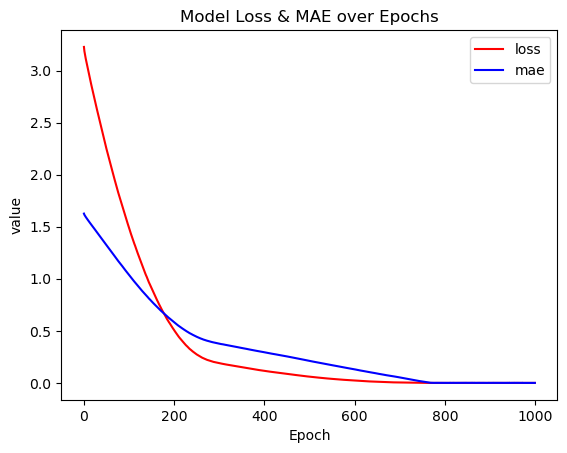

In [29]:
plt.plot(hist.history['loss'], 'r', label='loss')
plt.plot(hist.history['mae'], 'b', label='mae')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('value')
plt.title('Model Loss & MAE over Epochs')
plt.show()

In [30]:
# 7. 모델 사용하기
model.predict(np.array([[0],
                        [0.01]]))

1/1 [==============================] - 0s 29ms/step


array([[0.31965587],
       [0.33765152]], dtype=float32)

In [31]:
model.save('model/after_learning.h5')

In [38]:
# 실제값 : scaled_data_f
# 예측값 : y_hat
y_hat = model.predict([scaled_data_c])
for y, h in zip(scaled_data_f, y_hat):
    print("실제값:{}, 예측값:{}".format(round(y*100,1), 
                                      round(h[0]*100, 1)))

4/4 [==============================] - 0s 2ms/step
실제값:32.0, 예측값:32.0
실제값:33.8, 예측값:33.8
실제값:35.6, 예측값:35.6
실제값:37.4, 예측값:37.4
실제값:39.2, 예측값:39.2
실제값:41.0, 예측값:41.0
실제값:42.8, 예측값:42.8
실제값:44.6, 예측값:44.6
실제값:46.4, 예측값:46.4
실제값:48.2, 예측값:48.2
실제값:50.0, 예측값:50.0
실제값:51.8, 예측값:51.8
실제값:53.6, 예측값:53.6
실제값:55.4, 예측값:55.4
실제값:57.2, 예측값:57.2
실제값:59.0, 예측값:59.0
실제값:60.8, 예측값:60.8
실제값:62.6, 예측값:62.6
실제값:64.4, 예측값:64.4
실제값:66.2, 예측값:66.2
실제값:68.0, 예측값:68.0
실제값:69.8, 예측값:69.8
실제값:71.6, 예측값:71.6
실제값:73.4, 예측값:73.4
실제값:75.2, 예측값:75.2
실제값:77.0, 예측값:77.0
실제값:78.8, 예측값:78.8
실제값:80.6, 예측값:80.6
실제값:82.4, 예측값:82.4
실제값:84.2, 예측값:84.2
실제값:86.0, 예측값:86.0
실제값:87.8, 예측값:87.8
실제값:89.6, 예측값:89.6
실제값:91.4, 예측값:91.4
실제값:93.2, 예측값:93.2
실제값:95.0, 예측값:95.0
실제값:96.8, 예측값:96.7
실제값:98.6, 예측값:98.5
실제값:100.4, 예측값:100.3
실제값:102.2, 예측값:102.1
실제값:104.0, 예측값:103.9
실제값:105.8, 예측값:105.7
실제값:107.6, 예측값:107.5
실제값:109.4, 예측값:109.3
실제값:111.2, 예측값:111.1
실제값:113.0, 예측값:112.9
실제값:114.8, 예측값:114.7
실제값:116.6, 예측값:116.5
실제값:118.4, 예측값:11

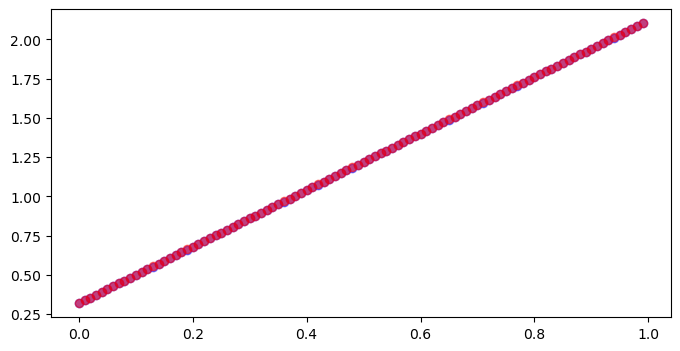

In [41]:
plt.figure(figsize=(8,4))
plt.scatter(x=scaled_data_c, y=y_hat, c='b', alpha=0.5)
plt.scatter(x=scaled_data_c, y=scaled_data_f, c='r', alpha=0.5)
plt.show()

## 2.2 노이즈가 있는 데이터로 실습

In [45]:
# 평균이 0이고 표준편차가 0.1인 정규분포를 이루는 데이터 100
np.random.seed(7)
noise = np.random.normal(loc=0, scale=0.1, size=100)
# print(noise)
# print(scaled_data_f)
scaled_data_f = scaled_data_f+noise

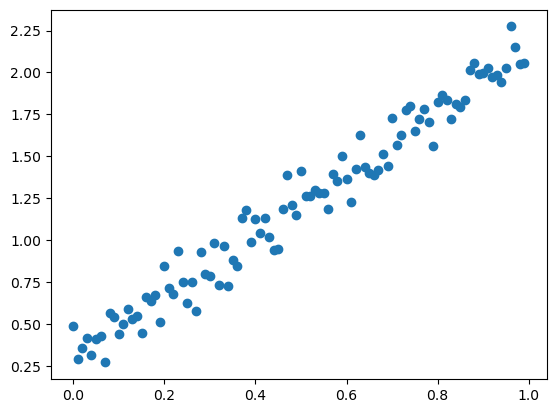

In [46]:
plt.scatter(x=scaled_data_c, y=scaled_data_f)
plt.show()

In [47]:
# 3. 모델 구성
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,)))

# 4. 모델 학습과정 설정
model2.compile(loss="mse", optimizer='rmsprop', metrics=['mae'])
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
# 5. 학습시키기
hist2 = model2.fit(scaled_data_c, scaled_data_f, epochs=1000, verbose=2)

Epoch 1/1000
4/4 - 0s - loss: 1.2421 - mae: 1.0258 - 266ms/epoch - 67ms/step
Epoch 2/1000
4/4 - 0s - loss: 1.2182 - mae: 1.0150 - 11ms/epoch - 3ms/step
Epoch 3/1000
4/4 - 0s - loss: 1.2006 - mae: 1.0071 - 17ms/epoch - 4ms/step
Epoch 4/1000
4/4 - 0s - loss: 1.1837 - mae: 0.9992 - 17ms/epoch - 4ms/step
Epoch 5/1000
4/4 - 0s - loss: 1.1702 - mae: 0.9929 - 17ms/epoch - 4ms/step
Epoch 6/1000
4/4 - 0s - loss: 1.1569 - mae: 0.9866 - 17ms/epoch - 4ms/step
Epoch 7/1000
4/4 - 0s - loss: 1.1445 - mae: 0.9808 - 30ms/epoch - 8ms/step
Epoch 8/1000
4/4 - 0s - loss: 1.1317 - mae: 0.9748 - 16ms/epoch - 4ms/step
Epoch 9/1000
4/4 - 0s - loss: 1.1185 - mae: 0.9685 - 17ms/epoch - 4ms/step
Epoch 10/1000
4/4 - 0s - loss: 1.1068 - mae: 0.9630 - 17ms/epoch - 4ms/step
Epoch 11/1000
4/4 - 0s - loss: 1.0947 - mae: 0.9571 - 17ms/epoch - 4ms/step
Epoch 12/1000
4/4 - 0s - loss: 1.0825 - mae: 0.9511 - 15ms/epoch - 4ms/step
Epoch 13/1000
4/4 - 0s - loss: 1.0701 - mae: 0.9452 - 14ms/epoch - 3ms/step
Epoch 14/1000
4/4 -

Epoch 110/1000
4/4 - 0s - loss: 0.2489 - mae: 0.4078 - 0s/epoch - 0s/step
Epoch 111/1000
4/4 - 0s - loss: 0.2439 - mae: 0.4033 - 15ms/epoch - 4ms/step
Epoch 112/1000
4/4 - 0s - loss: 0.2392 - mae: 0.3990 - 0s/epoch - 0s/step
Epoch 113/1000
4/4 - 0s - loss: 0.2347 - mae: 0.3950 - 3ms/epoch - 639us/step
Epoch 114/1000
4/4 - 0s - loss: 0.2297 - mae: 0.3904 - 17ms/epoch - 4ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.2255 - mae: 0.3864 - 17ms/epoch - 4ms/step
Epoch 116/1000
4/4 - 0s - loss: 0.2202 - mae: 0.3816 - 16ms/epoch - 4ms/step
Epoch 117/1000
4/4 - 0s - loss: 0.2155 - mae: 0.3771 - 17ms/epoch - 4ms/step
Epoch 118/1000
4/4 - 0s - loss: 0.2112 - mae: 0.3729 - 17ms/epoch - 4ms/step
Epoch 119/1000
4/4 - 0s - loss: 0.2067 - mae: 0.3688 - 17ms/epoch - 4ms/step
Epoch 120/1000
4/4 - 0s - loss: 0.2021 - mae: 0.3646 - 17ms/epoch - 4ms/step
Epoch 121/1000
4/4 - 0s - loss: 0.1985 - mae: 0.3611 - 17ms/epoch - 4ms/step
Epoch 122/1000
4/4 - 0s - loss: 0.1939 - mae: 0.3567 - 17ms/epoch - 4ms/step
Epoc

Epoch 217/1000
4/4 - 0s - loss: 0.0478 - mae: 0.1823 - 16ms/epoch - 4ms/step
Epoch 218/1000
4/4 - 0s - loss: 0.0474 - mae: 0.1817 - 15ms/epoch - 4ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.0472 - mae: 0.1813 - 17ms/epoch - 4ms/step
Epoch 220/1000
4/4 - 0s - loss: 0.0469 - mae: 0.1806 - 17ms/epoch - 4ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.0465 - mae: 0.1800 - 17ms/epoch - 4ms/step
Epoch 222/1000
4/4 - 0s - loss: 0.0462 - mae: 0.1792 - 17ms/epoch - 4ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.0458 - mae: 0.1785 - 16ms/epoch - 4ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.0455 - mae: 0.1779 - 17ms/epoch - 4ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.0452 - mae: 0.1775 - 17ms/epoch - 4ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.0449 - mae: 0.1768 - 17ms/epoch - 4ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.0446 - mae: 0.1761 - 17ms/epoch - 4ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.0443 - mae: 0.1755 - 16ms/epoch - 4ms/step
Epoch 229/1000
4/4 - 0s - loss: 0.0439 - mae: 0.1748 - 17ms/epoch - 4ms/step

Epoch 324/1000
4/4 - 0s - loss: 0.0206 - mae: 0.1181 - 0s/epoch - 0s/step
Epoch 325/1000
4/4 - 0s - loss: 0.0204 - mae: 0.1176 - 17ms/epoch - 4ms/step
Epoch 326/1000
4/4 - 0s - loss: 0.0202 - mae: 0.1172 - 16ms/epoch - 4ms/step
Epoch 327/1000
4/4 - 0s - loss: 0.0201 - mae: 0.1168 - 17ms/epoch - 4ms/step
Epoch 328/1000
4/4 - 0s - loss: 0.0199 - mae: 0.1161 - 0s/epoch - 0s/step
Epoch 329/1000
4/4 - 0s - loss: 0.0197 - mae: 0.1157 - 0s/epoch - 0s/step
Epoch 330/1000
4/4 - 0s - loss: 0.0196 - mae: 0.1154 - 17ms/epoch - 4ms/step
Epoch 331/1000
4/4 - 0s - loss: 0.0195 - mae: 0.1151 - 16ms/epoch - 4ms/step
Epoch 332/1000
4/4 - 0s - loss: 0.0193 - mae: 0.1144 - 17ms/epoch - 4ms/step
Epoch 333/1000
4/4 - 0s - loss: 0.0192 - mae: 0.1141 - 16ms/epoch - 4ms/step
Epoch 334/1000
4/4 - 0s - loss: 0.0191 - mae: 0.1137 - 0s/epoch - 0s/step
Epoch 335/1000
4/4 - 0s - loss: 0.0189 - mae: 0.1130 - 17ms/epoch - 4ms/step
Epoch 336/1000
4/4 - 0s - loss: 0.0188 - mae: 0.1126 - 16ms/epoch - 4ms/step
Epoch 337/1

Epoch 432/1000
4/4 - 0s - loss: 0.0113 - mae: 0.0837 - 0s/epoch - 0s/step
Epoch 433/1000
4/4 - 0s - loss: 0.0113 - mae: 0.0836 - 6ms/epoch - 2ms/step
Epoch 434/1000
4/4 - 0s - loss: 0.0113 - mae: 0.0834 - 17ms/epoch - 4ms/step
Epoch 435/1000
4/4 - 0s - loss: 0.0113 - mae: 0.0832 - 14ms/epoch - 3ms/step
Epoch 436/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0832 - 11ms/epoch - 3ms/step
Epoch 437/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0834 - 3ms/epoch - 812us/step
Epoch 438/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0832 - 7ms/epoch - 2ms/step
Epoch 439/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0830 - 15ms/epoch - 4ms/step
Epoch 440/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0827 - 12ms/epoch - 3ms/step
Epoch 441/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0827 - 2ms/epoch - 566us/step
Epoch 442/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0828 - 5ms/epoch - 1ms/step
Epoch 443/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0829 - 17ms/epoch - 4ms/step
Epoch 444/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0829 - 13ms/epoch - 3ms/step
Epo

Epoch 539/1000
4/4 - 0s - loss: 0.0104 - mae: 0.0808 - 3ms/epoch - 797us/step
Epoch 540/1000
4/4 - 0s - loss: 0.0104 - mae: 0.0806 - 16ms/epoch - 4ms/step
Epoch 541/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 16ms/epoch - 4ms/step
Epoch 542/1000
4/4 - 0s - loss: 0.0104 - mae: 0.0803 - 0s/epoch - 0s/step
Epoch 543/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0802 - 2ms/epoch - 426us/step
Epoch 544/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0800 - 17ms/epoch - 4ms/step
Epoch 545/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0802 - 17ms/epoch - 4ms/step
Epoch 546/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0801 - 0s/epoch - 0s/step
Epoch 547/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0802 - 580us/epoch - 145us/step
Epoch 548/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 17ms/epoch - 4ms/step
Epoch 549/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0802 - 16ms/epoch - 4ms/step
Epoch 550/1000
4/4 - 0s - loss: 0.0104 - mae: 0.0801 - 0s/epoch - 0s/step
Epoch 551/1000
4/4 - 0s - loss: 0.0104 - mae: 0.0801 - 680us/epoch - 170us/step


4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 0s/epoch - 0s/step
Epoch 647/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 17ms/epoch - 4ms/step
Epoch 648/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 16ms/epoch - 4ms/step
Epoch 649/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 17ms/epoch - 4ms/step
Epoch 650/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 0s/epoch - 0s/step
Epoch 651/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 1ms/epoch - 322us/step
Epoch 652/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 16ms/epoch - 4ms/step
Epoch 653/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 17ms/epoch - 4ms/step
Epoch 654/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 0s/epoch - 0s/step
Epoch 655/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 0s/epoch - 0s/step
Epoch 656/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 17ms/epoch - 4ms/step
Epoch 657/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 17ms/epoch - 4ms/step
Epoch 658/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 0s/epoch - 0s/step
Epoch 659/1000
4/4 - 0s - lo

Epoch 754/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 4ms/epoch - 1ms/step
Epoch 755/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 17ms/epoch - 4ms/step
Epoch 756/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 12ms/epoch - 3ms/step
Epoch 757/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 15ms/epoch - 4ms/step
Epoch 758/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 0s/epoch - 0s/step
Epoch 759/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 16ms/epoch - 4ms/step
Epoch 760/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 17ms/epoch - 4ms/step
Epoch 761/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 17ms/epoch - 4ms/step
Epoch 762/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 0s/epoch - 0s/step
Epoch 763/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 1ms/epoch - 367us/step
Epoch 764/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 16ms/epoch - 4ms/step
Epoch 765/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 17ms/epoch - 4ms/step
Epoch 766/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 17ms/epoch - 4ms/step
Epoch

Epoch 862/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 16ms/epoch - 4ms/step
Epoch 863/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 17ms/epoch - 4ms/step
Epoch 864/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 0s/epoch - 0s/step
Epoch 865/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0808 - 17ms/epoch - 4ms/step
Epoch 866/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 16ms/epoch - 4ms/step
Epoch 867/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 17ms/epoch - 4ms/step
Epoch 868/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 16ms/epoch - 4ms/step
Epoch 869/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 0s/epoch - 0s/step
Epoch 870/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 17ms/epoch - 4ms/step
Epoch 871/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 17ms/epoch - 4ms/step
Epoch 872/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 16ms/epoch - 4ms/step
Epoch 873/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0808 - 0s/epoch - 0s/step
Epoch 874/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 17ms/epoch - 4ms/step
Epoch 87

Epoch 970/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 14ms/epoch - 4ms/step
Epoch 971/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 0s/epoch - 0s/step
Epoch 972/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 1ms/epoch - 366us/step
Epoch 973/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 17ms/epoch - 4ms/step
Epoch 974/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 17ms/epoch - 4ms/step
Epoch 975/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 0s/epoch - 0s/step
Epoch 976/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 564us/epoch - 141us/step
Epoch 977/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 17ms/epoch - 4ms/step
Epoch 978/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0808 - 16ms/epoch - 4ms/step
Epoch 979/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 0s/epoch - 0s/step
Epoch 980/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0811 - 2ms/epoch - 414us/step
Epoch 981/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0811 - 17ms/epoch - 4ms/step
Epoch 982/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0812 - 17ms/epoch - 4ms/step
Epo

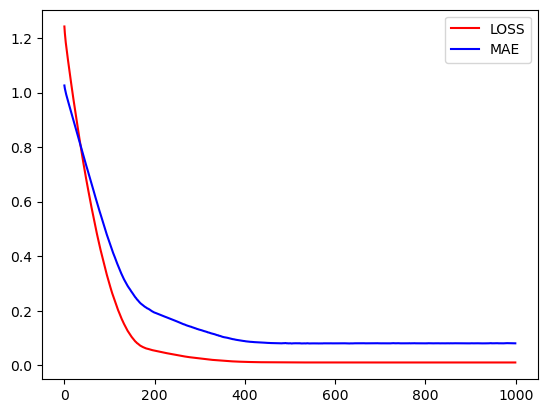

In [50]:
# 6. 평가하기
plt.plot(hist2.history['loss'], 'r', label='LOSS')
plt.plot(hist2.history['mae'], 'b', label='MAE')
plt.legend()
plt.show()

In [52]:
# 7. 예측하기
model2.predict(np.array([[0],
                         [0.01]]))

1/1 [==============================] - 0s 33ms/step


array([[0.3008648 ],
       [0.31928903]], dtype=float32)

In [53]:
y_hat2 = model2.predict([scaled_data_c])

4/4 [==============================] - 0s 2ms/step


In [54]:
for h, y in zip(y_hat2, scaled_data_f):
    print("예측:{}, 실제:{}".format(h, y))

예측:[0.3008648], 실제:0.48905257038003563
예측:[0.31928903], 실제:0.2914062629459167
예측:[0.33771327], 실제:0.3592820163678585
예측:[0.3561375], 실제:0.4147516282996508
예측:[0.37456176], 실제:0.31310769713742614
예측:[0.392986], 실제:0.4102065572905948
예측:[0.41141024], 실제:0.42791096141420687
예측:[0.42983449], 실제:0.2705275693654579
예측:[0.4482587], 실제:0.5657658005663493
예측:[0.46668297], 실제:0.542049851591955
예측:[0.48510718], 실제:0.43745710260332404
예측:[0.50353146], 실제:0.5008451738804279
예측:[0.52195567], 실제:0.5865299374196752
예측:[0.5403799], 실제:0.5278643584808353
예측:[0.55880415], 실제:0.5477250921327455
예측:[0.5772284], 실제:0.44467585875092086
예측:[0.59565264], 실제:0.6634580311891888
예측:[0.61407685], 실제:0.6383880905287038
예측:[0.6325011], 실제:0.6714459923759963
예측:[0.6509254], 실제:0.509347546813016
예측:[0.6693496], 실제:0.8450699691186476
예측:[0.6877738], 실제:0.7134335535456359
예측:[0.7061981], 실제:0.6772860056713612
예측:[0.72462237], 실제:0.9369072220761113
예측:[0.7430466], 실제:0.7474613970139354
예측:[0.7614708], 실제:0.62493213008534

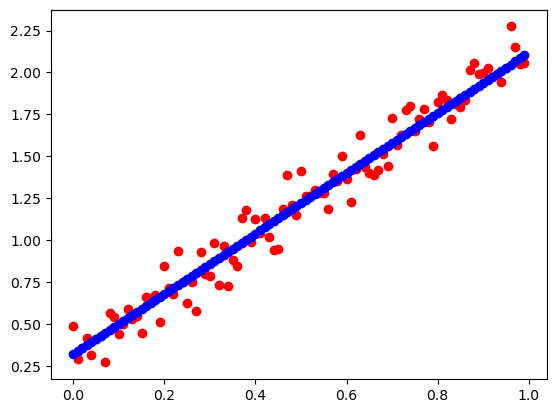

In [57]:
plt.scatter(x=scaled_data_c, y=scaled_data_f, c='r')
plt.scatter(x=scaled_data_c, y=y_hat, c='b')
plt.show()